In [1]:
#Loading in the model that was created during the training process 
from sklearn.externals import joblib
loaded_model = joblib.load('24hourVAR.pkl') 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [3]:
#New independent dataset - not seen before 
df = pd.read_csv('/Users/judemurphy/Project Notebooks/prediction_data.csv')
df.head()

timestamp  blood_glucose  rapid_acting_insulin  \
0  02/05/2019 00:00            5.8                     0   
1  02/05/2019 00:05            6.0                     0   
2  02/05/2019 00:10            6.1                     0   
3  02/05/2019 00:15            6.1                     0   
4  02/05/2019 00:20            6.1                     0   

   carbohydrates_consumed  protein_consumed  fat_consumed  \
0                       0                 0             0   
1                       0                 0             0   
2                       0                 0             0   
3                       0                 0             0   
4                       0                 0             0   

   long_acting_insulin  asleep_awake  active_inactive  
0                    0             1                0  
1                    0             1                0  
2                    0             1                0  
3                    0             1                0  
4                    0             1                0

In [4]:
df.dtypes

timestamp                  object
blood_glucose             float64
rapid_acting_insulin        int64
carbohydrates_consumed      int64
protein_consumed            int64
fat_consumed                int64
long_acting_insulin         int64
asleep_awake                int64
active_inactive             int64
dtype: object

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df = df.set_index('timestamp')

In [7]:
df 

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2019-02-05 00:00:00            5.8                     0   
2019-02-05 00:05:00            6.0                     0   
2019-02-05 00:10:00            6.1                     0   
2019-02-05 00:15:00            6.1                     0   
2019-02-05 00:20:00            6.1                     0   
2019-02-05 00:25:00            6.1                     0   
2019-02-05 00:30:00            6.0                     0   
2019-02-05 00:35:00            6.0                     0   
2019-02-05 00:40:00            6.0                     0   
2019-02-05 00:45:00            6.0                     0   
2019-02-05 00:50:00            6.0                     0   
2019-02-05 00:55:00            6.0                     0   
2019-02-05 01:00:00            5.9                     0   
2019-02-05 01:05:00            5.9                     0   
2019-02-05 01:10:00            5.9                     0   
2019-02-05 01:15:00            5.9                     0   
2019-02-05 01:20:00            5.9                     0   
2019-02-05 01:25:00            6.0                     0   
2019-02-05 01:30:00            6.0                     0   
2019-02-05 01:35:00            6.0                     0   
2019-02-05 01:40:00            6.0                     0   
2019-02-05 01:45:00            6.0                     0   
2019-02-05 01:50:00            6.0                     0   
2019-02-05 01:55:00            5.9                     0   
2019-02-05 02:00:00            5.9                     0   
2019-02-05 02:05:00            5.9                     0   
2019-02-05 02:10:00            5.9                     0   
2019-02-05 02:15:00            5.9                     0   
2019-02-05 02:20:00            5.9                     0   
2019-02-05 02:25:00            5.9                     0   
...                            ...                   ...   
2019-02-06 21:35:00           12.3                     5   
2019-02-06 21:40:00           13.0                     0   
2019-02-06 21:45:00           13.8                     0   
2019-02-06 21:50:00           14.5                     0   
2019-02-06 21:55:00           15.5                     0   
2019-02-06 22:00:00           16.6                     0   
2019-02-06 22:05:00           17.6                     0   
2019-02-06 22:10:00           18.8                     0   
2019-02-06 22:15:00           19.0                     0   
2019-02-06 22:20:00           19.2                     0   
2019-02-06 22:25:00           19.3                     0   
2019-02-06 22:30:00           19.5                     0   
2019-02-06 22:35:00           19.7                     0   
2019-02-06 22:40:00           19.7                     0   
2019-02-06 22:45:00           19.7                     0   
2019-02-06 22:50:00           19.7                     0   
2019-02-06 22:55:00           19.5                     0   
2019-02-06 23:00:00           19.4                     0   
2019-02-06 23:05:00           19.7                     0   
2019-02-06 23:10:00           19.9                     0   
2019-02-06 23:15:00           20.2                     0   
2019-02-06 23:20:00           20.4                     3   
2019-02-06 23:25:00           20.3                     0   
2019-02-06 23:30:00           20.1                     0   
2019-02-06 23:35:00           20.0                     0   
2019-02-06 23:40:00           19.9                     0   
2019-02-06 23:45:00           19.8                     0   
2019-02-06 23:50:00           19.7                     0   
2019-02-06 23:55:00           19.5                     0   
2019-02-07 00:00:00           19.3                     0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2019-02-05 00:00:00                       0                 0             0   
201

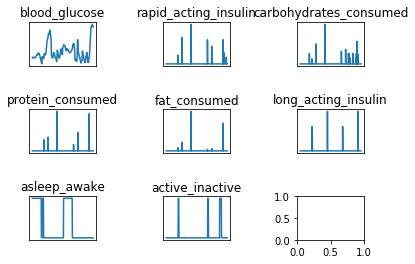

In [8]:
groups = [0, 1, 2, 3, 4, 5, 6, 7]
values = df.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(df.columns[i])

In [9]:
#Normalising the test dataset 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([0.15116279, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [10]:
scaled

array([[0.15116279, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1627907 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16860465, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.95930233, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94767442, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93604651, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
scaled.shape

(577, 8)

In [12]:
test = scaled[:289]
actual = scaled[289:]

In [15]:
test.shape

(289, 8)

In [13]:
actual.shape

(288, 8)

In [14]:
loaded_model

In [15]:
loaded_model.select_order(15)

In [16]:
results = loaded_model.fit(maxlags=15, ic='aic')

In [17]:
lag_order = results.k_ar

In [18]:
y_pred = results.forecast(pd.DataFrame(test).values[-lag_order:], 288)

In [19]:
y_pred

array([[0.42566775, 0.00999113, 0.00826356, ..., 0.01116681, 0.01212464,
        0.0043812 ],
       [0.4394654 , 0.00785151, 0.00713646, ..., 0.00664993, 0.02172832,
        0.01073462],
       [0.44758181, 0.01405951, 0.01011989, ..., 0.00668183, 0.02851514,
        0.01969619],
       ...,
       [0.36780331, 0.00561129, 0.00552541, ..., 0.00531468, 0.31567717,
        0.08716033],
       [0.36780344, 0.00561128, 0.00552539, ..., 0.00531464, 0.31568406,
        0.0871599 ],
       [0.36780357, 0.00561127, 0.00552536, ..., 0.0053146 , 0.31569078,
        0.08715949]])

In [20]:
actual

array([[0.4127907 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41860465, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4244186 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95930233, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94767442, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93604651, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
y_pred.shape

(288, 8)

In [22]:
actual.shape

(288, 8)

In [23]:
#Transforming back to original scale 
y_pred = scaler.inverse_transform(y_pred)

In [24]:
y_pred

array([[1.05214854e+01, 1.79840264e-01, 7.85037901e-01, ...,
        1.45168553e-01, 1.21246364e-02, 4.38119578e-03],
       [1.07588049e+01, 1.41327119e-01, 6.77964040e-01, ...,
        8.64491487e-02, 2.17283191e-02, 1.07346249e-02],
       [1.08984072e+01, 2.53071173e-01, 9.61389496e-01, ...,
        8.68637512e-02, 2.85151441e-02, 1.96961907e-02],
       ...,
       [9.52621694e+00, 1.01003150e-01, 5.24914307e-01, ...,
        6.90908121e-02, 3.15677170e-01, 8.71603283e-02],
       [9.52621920e+00, 1.01003017e-01, 5.24911851e-01, ...,
        6.90902857e-02, 3.15684059e-01, 8.71599027e-02],
       [9.52622139e+00, 1.01002888e-01, 5.24909456e-01, ...,
        6.90897723e-02, 3.15690778e-01, 8.71594878e-02]])

In [25]:
#Transforming back to original scale 
actual = scaler.inverse_transform(actual)

In [26]:
actual

array([[10.3,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [10.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [10.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [19.7,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [19.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [19.3,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [27]:
#Cutting to ensure only 24 hours 
actual = actual[0:288]

In [28]:
actual

array([[10.3,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [10.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [10.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [19.7,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [19.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [19.3,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [29]:
actual.shape

(288, 8)

In [30]:
y_pred.shape

(288, 8)

In [31]:
#Using only blood glucose reading 
y_pred = y_pred[:,0]

In [32]:
y_pred

array([10.52148536, 10.75880493, 10.89840716, 11.03741827, 11.1062347 ,
       11.11627585, 11.12274226, 11.10451832, 11.0696531 , 11.02707093,
       10.97576966, 10.9198615 , 10.86243249, 10.80329682, 10.74403267,
       10.68515924, 10.62700802, 10.57008676, 10.51466344, 10.46083754,
       10.40891774, 10.35893095, 10.31098192, 10.26513667, 10.22137919,
       10.17972399, 10.1401617 , 10.10263536, 10.06710748, 10.03351907,
       10.00180107,  9.97188662,  9.94370095,  9.91716622,  9.89220548,
        9.8687404 ,  9.84669329,  9.82598838,  9.8065514 ,  9.7883106 ,
        9.77119691,  9.75514415,  9.74008915,  9.72597187,  9.71273537,
        9.70032584,  9.68869249,  9.67778748,  9.66756584,  9.65798527,
        9.64900612,  9.64059117,  9.63270552,  9.62531646,  9.61839336,
        9.61190747,  9.6058319 ,  9.6001414 ,  9.59481232,  9.58982249,
        9.58515111,  9.58077866,  9.57668684,  9.57285845,  9.56927737,
        9.56592843,  9.56279741,  9.55987093,  9.55713644,  9.55

In [33]:
#Using only blood glucose reading 
actual = actual[:,0]

In [34]:
actual

array([10.3, 10.4, 10.5, 10.6, 10.7, 11. , 11.3, 11.4, 11.4, 11.5, 11.5,
       11.4, 11.4, 11.3, 11.3, 11.2, 11.1, 11. , 10.9, 10.9, 10.8, 10.8,
       10.6, 10.5, 10.3, 10. ,  9.6,  9.3,  9.2,  9.1,  9. ,  9.2,  9.4,
        9.6,  9.7,  9.8,  9.9,  9.9,  9.8,  9.8,  9.6,  9.5,  9.3,  9.3,
        9.3,  9.3,  9.3,  9.3,  9.3,  9.1,  9. ,  8.8,  8.8,  8.8,  8.8,
        8.7,  8.7,  8.6,  8.4,  8.3,  8.1,  8.1,  8.1,  8.1,  8.1,  8. ,
        8. ,  8. ,  8. ,  8. ,  8.1,  8.3,  8.4,  8.5,  8.5,  8.6,  8.7,
        8.7,  8.8,  8.9,  8.9,  9. ,  9. ,  9.1,  9.1,  9.3,  9.6,  9.8,
        9.9,  9.9, 10. , 10.3, 10.5, 10.8, 11.1, 11.4, 11.7, 11.6, 11.5,
       11.6, 11.7, 11.8, 11.9, 11.9, 12. , 11.7, 11.5, 11.2, 10.7, 10.3,
        9.8,  9.4,  8. ,  6.6,  5.3,  5.1,  4.9,  4.7,  4.8,  4.8,  4.9,
        5. ,  5.1,  5.2,  5.1,  4.9,  4.8,  4.6,  4.5,  4.3,  4.3,  4.3,
        4.3,  4.9,  5.5,  7.9,  9.2, 10.5, 12.6, 13.2, 13.7, 13.5, 12. ,
       11. ,  9.9,  9.4,  8.8,  8.3,  8.1,  7.8,  7

In [35]:
y_pred = np.round_(y_pred, decimals=1, out = None)

In [36]:
actual

array([10.3, 10.4, 10.5, 10.6, 10.7, 11. , 11.3, 11.4, 11.4, 11.5, 11.5,
       11.4, 11.4, 11.3, 11.3, 11.2, 11.1, 11. , 10.9, 10.9, 10.8, 10.8,
       10.6, 10.5, 10.3, 10. ,  9.6,  9.3,  9.2,  9.1,  9. ,  9.2,  9.4,
        9.6,  9.7,  9.8,  9.9,  9.9,  9.8,  9.8,  9.6,  9.5,  9.3,  9.3,
        9.3,  9.3,  9.3,  9.3,  9.3,  9.1,  9. ,  8.8,  8.8,  8.8,  8.8,
        8.7,  8.7,  8.6,  8.4,  8.3,  8.1,  8.1,  8.1,  8.1,  8.1,  8. ,
        8. ,  8. ,  8. ,  8. ,  8.1,  8.3,  8.4,  8.5,  8.5,  8.6,  8.7,
        8.7,  8.8,  8.9,  8.9,  9. ,  9. ,  9.1,  9.1,  9.3,  9.6,  9.8,
        9.9,  9.9, 10. , 10.3, 10.5, 10.8, 11.1, 11.4, 11.7, 11.6, 11.5,
       11.6, 11.7, 11.8, 11.9, 11.9, 12. , 11.7, 11.5, 11.2, 10.7, 10.3,
        9.8,  9.4,  8. ,  6.6,  5.3,  5.1,  4.9,  4.7,  4.8,  4.8,  4.9,
        5. ,  5.1,  5.2,  5.1,  4.9,  4.8,  4.6,  4.5,  4.3,  4.3,  4.3,
        4.3,  4.9,  5.5,  7.9,  9.2, 10.5, 12.6, 13.2, 13.7, 13.5, 12. ,
       11. ,  9.9,  9.4,  8.8,  8.3,  8.1,  7.8,  7

In [37]:
y_pred

array([10.5, 10.8, 10.9, 11. , 11.1, 11.1, 11.1, 11.1, 11.1, 11. , 11. ,
       10.9, 10.9, 10.8, 10.7, 10.7, 10.6, 10.6, 10.5, 10.5, 10.4, 10.4,
       10.3, 10.3, 10.2, 10.2, 10.1, 10.1, 10.1, 10. , 10. , 10. ,  9.9,
        9.9,  9.9,  9.9,  9.8,  9.8,  9.8,  9.8,  9.8,  9.8,  9.7,  9.7,
        9.7,  9.7,  9.7,  9.7,  9.7,  9.7,  9.6,  9.6,  9.6,  9.6,  9.6,
        9.6,  9.6,  9.6,  9.6,  9.6,  9.6,  9.6,  9.6,  9.6,  9.6,  9.6,
        9.6,  9.6,  9.6,  9.6,  9.6,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9

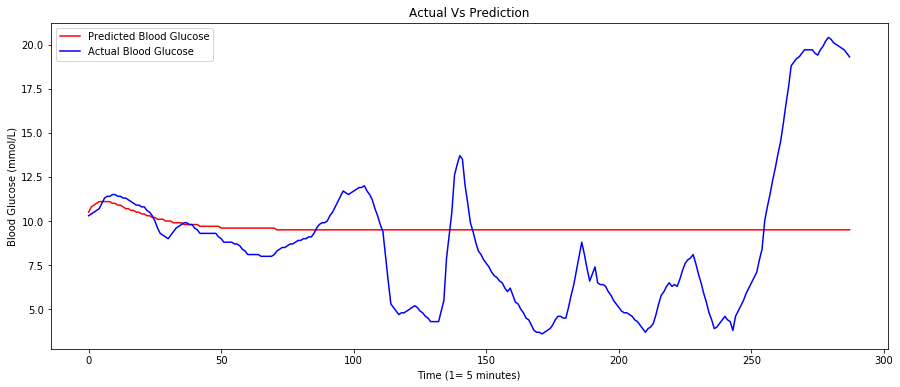

In [38]:
# Visualising the results
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(y_pred, color = 'red', label = 'Predicted Blood Glucose')
plt.plot(actual, color = 'blue', label = 'Actual Blood Glucose')
plt.title('Actual Vs Prediction')
plt.xlabel('Time (1= 5 minutes)')
plt.ylabel('Blood Glucose (mmol/L)')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#calculate RMSE
rmse = sqrt(mean_squared_error(actual, y_pred))
print('Test RMSE: %.4f' % rmse)

Test RMSE: 4.1848
